# Preparing Time Series from Wide-Form Data

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

In [2]:
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(12,4)

## Prepare the dataset for time series analysis

### Load in the Zillow Home Value Index dataframe.

In [3]:
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv'
df = pd.read_csv(url)
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22467 entries, 0 to 22466
Columns: 281 entries, RegionID to 2022-09-30
dtypes: float64(273), int64(2), object(6)
memory usage: 48.2+ MB


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0


### Filter the 4 largest cities into a new dataframe.


In [4]:
sizerank=[0,1,2,3]
df = df[df['SizeRank'].isin(sizerank)]
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


### Melt the data to long-form and prepare it for time series analysis.

In [5]:
# Melt the data to long-form and drop unnecessary columns 
melted = pd.melt(df.drop(columns=['RegionID','SizeRank','RegionType','StateName','Metro','CountyName']),id_vars=['RegionName','State'],value_name='HomePrice',var_name='Date')
melted

,RegionName,State,Date,HomePrice
0,New York,NY,2000-01-31,253690.0
1,Los Angeles,CA,2000-01-31,234181.0
2,Houston,TX,2000-01-31,109068.0
3,Chicago,IL,2000-01-31,166139.0
4,New York,NY,2000-02-29,255517.0
...,...,...,...,...
1087,Chicago,IL,2022-08-31,315587.0
1088,New York,NY,2022-09-30,781622.0
1089,Los Angeles,CA,2022-09-30,966595.0
1090,Houston,TX,2022-09-30,272639.0


In [6]:
# Convert the melted dates into datetime datatype.
melted['Date'] = pd.to_datetime(melted['Date'])
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionName  1092 non-null   object        
 1   State       1092 non-null   object        
 2   Date        1092 non-null   datetime64[ns]
 3   HomePrice   1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 34.2+ KB


In [7]:
# Set 'date' as index
melted = melted.set_index('Date')
melted

,RegionName,State,HomePrice
Date,,,
2000-01-31,New York,NY,253690.0
2000-01-31,Los Angeles,CA,234181.0
2000-01-31,Houston,TX,109068.0
2000-01-31,Chicago,IL,166139.0
2000-02-29,New York,NY,255517.0
...,...,...,...
2022-08-31,Chicago,IL,315587.0
2022-09-30,New York,NY,781622.0
2022-09-30,Los Angeles,CA,966595.0


### Resample the dataframe as monthly frequency, grouped by City

In [8]:
df_ts = melted.groupby('RegionName').resample('M').sum(numeric_only=True)
df_ts

HomePrice
RegionName Date                 
Chicago    2000-01-31   166139.0
           2000-02-29   166536.0
           2000-03-31   167368.0
           2000-04-30   168826.0
           2000-05-31   170499.0
...                          ...
New York   2022-05-31   768797.0
           2022-06-30   773944.0
           2022-07-31   777692.0
           2022-08-31   779960.0
           2022-09-30   781622.0

[1092 rows x 1 columns]

## Plot the home values for all 4 cities.

In [9]:
# Use unstack to convert nulti-index cities into columns
## Check level value 
df_ts.index.get_level_values(0)

Index(['Chicago', 'Chicago', 'Chicago', 'Chicago', 'Chicago', 'Chicago',
       'Chicago', 'Chicago', 'Chicago', 'Chicago',
       ...
       'New York', 'New York', 'New York', 'New York', 'New York', 'New York',
       'New York', 'New York', 'New York', 'New York'],
      dtype='object', name='RegionName', length=1092)

In [10]:
unstacked = df_ts.unstack(level=0)
unstacked

HomePrice                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2000-01-31  166139.0  109068.0    234181.0  253690.0
2000-02-29  166536.0  109079.0    234401.0  255517.0
2000-03-31  167368.0  108878.0    235513.0  257207.0
2000-04-30  168826.0  108881.0    237589.0  260310.0
2000-05-31  170499.0  108834.0    240113.0  263204.0
...              ...       ...         ...       ...
2022-05-31  312487.0  265558.0    990391.0  768797.0
2022-06-30  314663.0  268901.0    992337.0  773944.0
2022-07-31  315910.0  271059.0    992630.0  777692.0
2022-08-31  315587.0  272400.0    978196.0  779960.0
2022-09-30  315429.0  272639.0    966595.0  781622.0

[273 rows x 4 columns]

- add a title and axis labels.
- Reformat the y-axis ticks to use thousands of dollars with a "K" at the end. 

In [11]:
# Create a function use with matplotlib FuncFormatter
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"

fmt_thous = mticks.FuncFormatter(thousands)

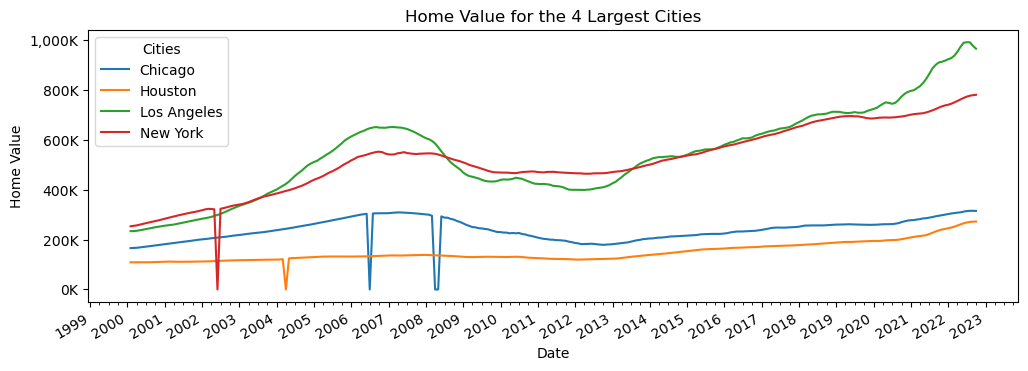

In [12]:
# Plot the home value for all 4 cities
ax=unstacked['HomePrice'].plot(title='Home Value for the 4 Largest Cities',ylabel='Home Value',x_compat=True)
ax.yaxis.set_major_formatter(fmt_thous)
loc_year = mdates.YearLocator()
fmt_year = mdates.DateFormatter("%Y")
ax.xaxis.set_major_locator(loc_year)
ax.xaxis.set_major_formatter(fmt_year)
loc_3months = mdates.MonthLocator(interval=3)
ax.xaxis.set_minor_locator(loc_3months)
ax.legend(title='Cities');

**City had the highest typical home value at the end of 2008 and Which had the least?**

In [13]:
df_ts.loc[pd.IndexSlice[:,'2008-12-31'],:]

,,HomePrice
RegionName,Date,
Chicago,2008-12-31,265306.0
Houston,2008-12-31,131283.0
Los Angeles,2008-12-31,469294.0
New York,2008-12-31,510309.0


- New York City had the highest typical home value of $510,309 at the end of 2008
  
- Houston City had the lowest typical home value of $131,283 at the end of 2008

**home values change from November 2008 to December 2008 (in dollars)**

In [14]:
ts_diff = df_ts.diff().loc[pd.IndexSlice['2008-11':,'2008-12'],:]
ts_diff

,,HomePrice
RegionName,Date,
Chicago,2008-12-31,-5753.0
Houston,2008-12-31,-964.0
Los Angeles,2008-12-31,-12611.0
New York,2008-12-31,-4458.0


---

# Time Series Models for Home Values

## Objective

**The overall goal is to forecast the home value for the city with the highest home value in 2008 (New York) 6months into the future.**

## Import Packages and custom functions

In [15]:
import statsmodels.tsa.api as tsa
from pmdarima.model_selection import train_test_split
from pmdarima.arima.utils import ndiffs, nsdiffs
import pmdarima as pm

In [16]:
# Custom function for Ad Fuller Test
def get_adfuller_results(ts, alpha=.05, label='adfuller', **kwargs): #kwargs for adfuller()
    # Saving each output
    (test_stat, pval, nlags, nobs, crit_vals_d, 
    icbest ) = tsa.adfuller(ts, **kwargs)
    # Converting output to a dictionary with the interpretation of p
    adfuller_results = {'Test Statistic': test_stat,
                        "# of Lags Used":nlags, 
                       '# of Observations':nobs,
                        'p-value': round(pval,6),
                        'alpha': alpha,
                       'sig/stationary?': pval < alpha}
    return pd.DataFrame(adfuller_results, index =[label])

In [17]:
def plot_acf_pacf(ts, nlags=40, figsize=(10, 5), 
                  annotate_sig=False, alpha=.05,
                 acf_kws={}, pacf_kws={},  
                  annotate_seas=False, m = None,
                 seas_color='black'):
    
    fig, axes = plt.subplots(nrows=2, figsize=figsize)
    
    # Sig lags line style
    sig_vline_kwargs = dict( ls=':', lw=1, zorder=0, color='red')
    # ACF
    tsa.graphics.plot_acf(ts, ax=axes[0], lags=nlags, **acf_kws)
    
    ## Annotating sig acf lags
    if annotate_sig == True:
        sig_acf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='ACF')
        for lag in sig_acf_lags:
            axes[0].axvline(lag,label='sig', **sig_vline_kwargs )
    # PACF
    tsa.graphics.plot_pacf(ts,ax=axes[1], lags=nlags, **pacf_kws)
    
    ## Annotating sig pacf lags
    if annotate_sig == True:
        ## ANNOTATING SIG LAGS
        sig_pacf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='PACF')
        for lag in sig_pacf_lags:
            axes[1].axvline(lag, label='sig', **sig_vline_kwargs)
    
    ### ANNOTATE SEASONS
    if annotate_seas == True:
        # Ensure m was defined
        if m is None:
            raise Exception("Must define value of m if annotate_seas=True.")
        ## Calculate number of complete seasons to annotate
        n_seasons = nlags//m 
        # Seasonal Lines style
        seas_vline_kwargs = dict( ls='--',lw=1, alpha=.7, color=seas_color, zorder=-1)
        
        ## for each season, add a line
        for i in range(1, n_seasons+1):
            axes[0].axvline(m*i, **seas_vline_kwargs, label="season")
            axes[1].axvline(m*i, **seas_vline_kwargs, label="season")
    fig.tight_layout()
    
    return fig

In [18]:
def plot_forecast(ts_train, ts_test, forecast_df, n_train_lags=None, 
                  figsize=(10,4), title='Comparing Forecast vs. True Data'):
    ### PLot training data, and forecast (with upper/,lower ci)
    fig, ax = plt.subplots(figsize=figsize)

    # setting the number of train lags to plot if not specified
    if n_train_lags==None:
        n_train_lags = len(ts_train)
            
    # Plotting Training  and test data
    ts_train.iloc[-n_train_lags:].plot(ax=ax, label="train")
    ts_test.plot(label="test", ax=ax)

    # Plot forecast
    forecast_df['mean'].plot(ax=ax, color='green', label="forecast")

    # Add the shaded confidence interval
    ax.fill_between(forecast_df.index, 
                    forecast_df['mean_ci_lower'],
                   forecast_df['mean_ci_upper'],
                   color='green', alpha=0.3,  lw=2)

    # set the title and add legend
    ax.set_title(title)
    ax.legend();
    
    return fig, ax

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def regression_metrics_ts(ts_true, ts_pred, label="", verbose=True, output_dict=False,):
    # Get metrics
    mae = mean_absolute_error(ts_true, ts_pred)
    mse = mean_squared_error(ts_true, ts_pred)
    rmse = mean_squared_error(ts_true, ts_pred, squared=False)
    r_squared = r2_score(ts_true, ts_pred)
    mae_perc = mean_absolute_percentage_error(ts_true, ts_pred) * 100

    if verbose == True:
        # Print Result with label
        header = "---" * 20
        print(header, f"Regression Metrics: {label}", header, sep="\n")
        print(f"- MAE = {mae:,.3f}")
        print(f"- MSE = {mse:,.3f}")
        print(f"- RMSE = {rmse:,.3f}")
        print(f"- R^2 = {r_squared:,.3f}")
        print(f"- MAPE = {mae_perc:,.2f}%")

    if output_dict == True:
        metrics = {
            "Label": label,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R^2": r_squared,
            "MAPE(%)": mae_perc,
        }
        return metrics

## Prepare Data for Modeling

In [20]:
# Filter the dataset only to include the city with the highest values in 2008 (NEW YORK) and values starting in 2018.
df_model=df_ts.loc['New York']
df_model=df_model.loc['2018':]
df_model.head()

,HomePrice
Date,
2018-01-31,656700.0
2018-02-28,661012.0
2018-03-31,665672.0
2018-04-30,669989.0
2018-05-31,673514.0


In [23]:
# Check for and address null values if necessary
df_model.isna().sum()

HomePrice    0
dtype: int64

No null value was found.

## Check for Seasonality

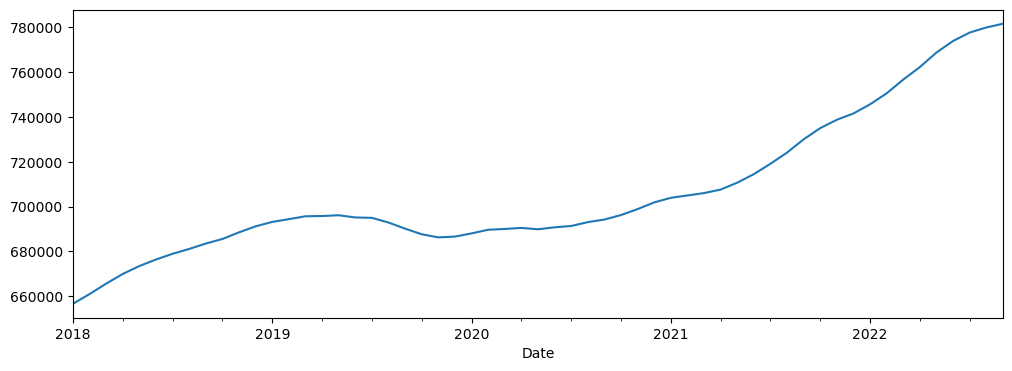

In [28]:
# Plot the data to observe the seasonal trend visually if possible
df_model = df_model['HomePrice']
df_model.plot();

No seasonal trend was identified based on the plot above.

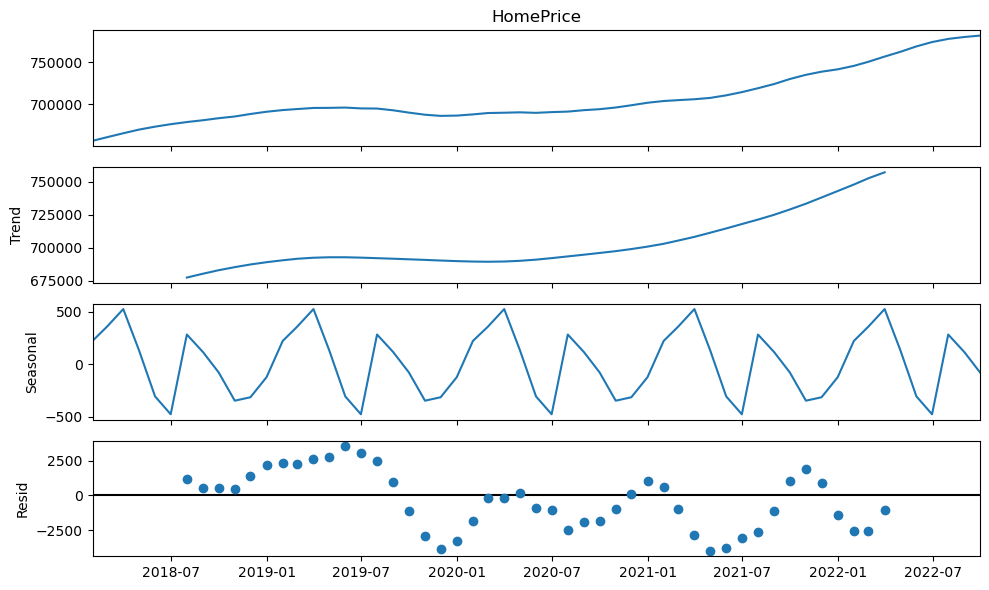

In [29]:
# Decompose the Time series to detect seasonality
decomp = tsa.seasonal_decompose(df_model)
fig = decomp.plot()
fig.set_size_inches(10,6)
fig.tight_layout();

Seasonal_decompose will always indicate some seasonality, noticed that the residual plot shows a strong pattern instead of random scatter points meaning that the data could have no or insignificant seasonality. 

In [30]:
# Check how big the seasonal component is and how big the seasonal component is relative to the time series.
seasonal_delta = decomp.seasonal.max() - decomp.seasonal.min()
print(f'The seasonal component is {seasonal_delta} which is ~ {seasonal_delta/(df_model.max()-df_model.min())*100:.2f}% of the variation in time series.')                                                     

The seasonal component is 1006.1319444443313 which is ~ 0.81% of the variation in time series.


**There is a seasonal component for approximately 0.81% of the total variation but it is not a dominant feature. Therefore, the model should not have a seasonal component.**

## Check for Stationality

In [31]:
# Check for time series for stationarity
# Use adfuller to check to see if data is stationary
get_adfuller_results(df_model)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,0.407572,4,52,0.981776,0.05,False


Data is not stationary.

In [32]:
# Determine the number of differencing needed to make the data stationary
d = ndiffs(df_model)
print(f' d = {d}')

 d = 2


Based on the result, 2 differencings are sufficient to make the data stationary. 

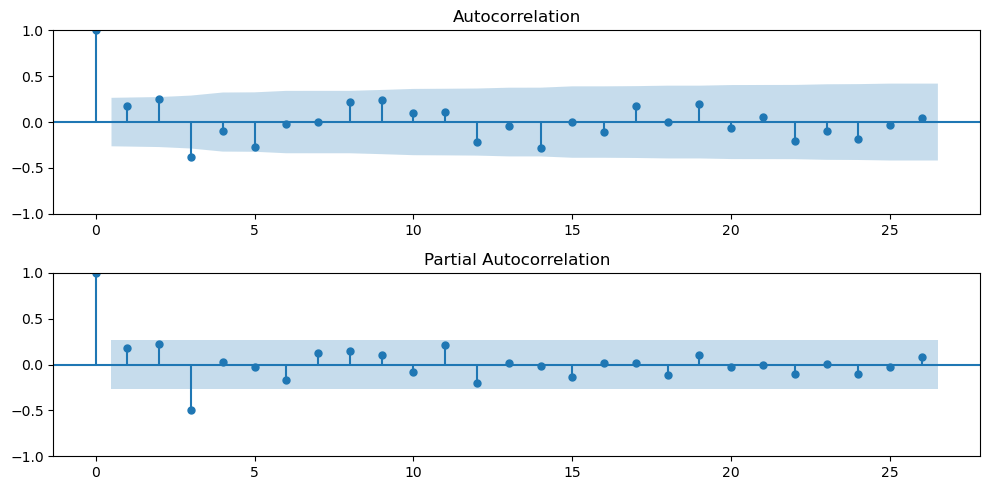

In [35]:
# Check the ACF/PACF Plots of the differenced data to determine the orders
df_diff = df_model.diff().diff().dropna()
plot_acf_pacf(df_diff,nlags=26);

Based on the ACF and PACF plots, both plots show a gradual decrease, most of the lags stay within the confidence interval (shaded area) so we can conclude that there is no autocorrelation. 

Based on the observation, we can start trying our ARIMA model with the ORDERS equal p = 1, d = 2, q = 1.

## Trian Test Split

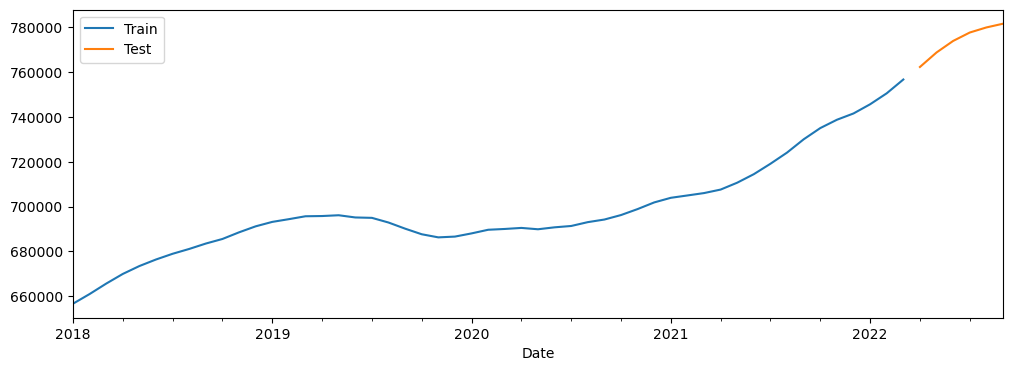

In [37]:
# Split the time series into training and test data (predict 6 months)
train, test = train_test_split(df_model, test_size=6)
ax = train.plot(label='Train')
test.plot(ax=ax,label='Test')
ax.legend();

## Fit the Manual ARIMAL  model

In [38]:
# Fit the model based on the orders determined previously.
p = 1
d = 2
q = 1
arima = tsa.ARIMA(train, order=(p,d,q)).fit()
arima.summary()

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              HomePrice   No. Observations:                   51
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -401.734
Date:                Mon, 08 Jan 2024   AIC                            809.469
Time:                        21:44:37   BIC                            815.144
Sample:                    01-31-2018   HQIC                           811.622
                         - 03-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9356      0.143     -6.558      0.000      -1.215      -0.656
ma.L1          0.9347      0.144      6.471      0.000       0.652       1.218
sigma2      7.732e+05   4.33e-09   1.79e+14      0.000    7.73e+05    7.73e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.63   Jarque-Bera (JB):                 1.79
Prob(Q):                              0.20   Prob(JB):                         0.41
Heteroskedasticity (H):               2.31   Skew:                            -0.01
Prob(H) (two-sided):                  0.10   Kurtosis:                         2.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.66e+31. Standard errors may be unstable.
"""

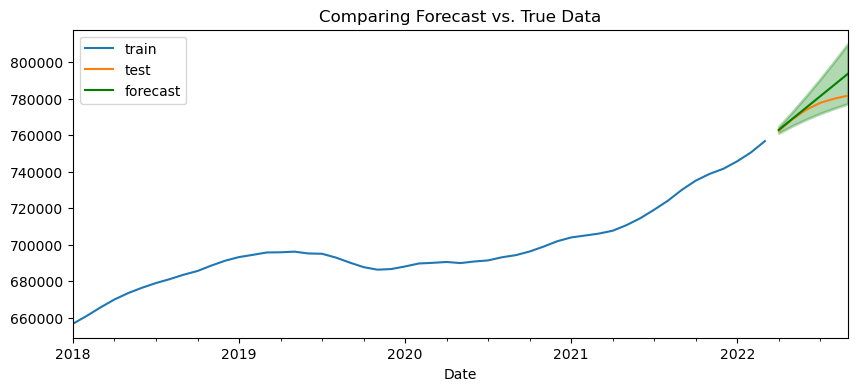

In [39]:
# Plot the forecasts versus the test data
df_forcast = arima.get_forecast(len(test)).summary_frame()
plot_forecast(train, test, df_forcast);

The prediction is within the confidence interval but did not catch the 'slow down' trend at the very end.

In [40]:
# Obtain metrics for evaluation
regression_metrics_ts(test, df_forcast['mean'])

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 4,195.246
- MSE = 35,936,469.064
- RMSE = 5,994.703
- R^2 = 0.203
- MAPE = 0.54%


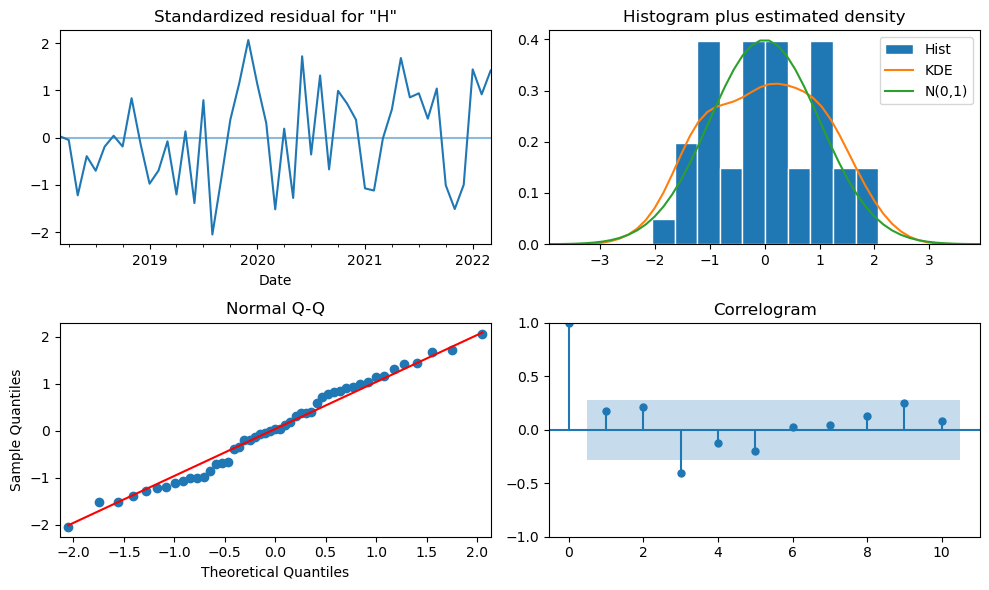

In [41]:
fig=arima.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

A significant value in the correlogram of the residuals at lag 3  indicates this model may have missed something. 

## Tune with Pmdarima's Auto_arima

In [42]:
# Use pmdarima's auto_arima to find the best parameter
auto_model = pm.auto_arima(train, seasonal=False, d=2, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=816.209, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=808.438, Time=0.00 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=810.335, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=810.360, Time=0.01 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=806.526, Time=0.00 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=811.431, Time=0.06 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.186 seconds


In [43]:
print(auto_model.order)

(0, 2, 0)


The pmdarima's auto_arima indicates a "random walk with drift" model will have the best fit.

In [44]:
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   51
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -402.263
Date:                Mon, 08 Jan 2024   AIC                            806.526
Time:                        22:00:27   BIC                            808.418
Sample:                    01-31-2018   HQIC                           807.244
                         - 03-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      7.899e+05   2.22e+05      3.550      0.000    3.54e+05    1.23e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.22   Jarque-Bera (JB):                 1.94
Prob(Q):                              0.27   Prob(JB):                         0.38
Heteroskedasticity (H):               1.99   Skew:                            -0.05
Prob(H) (two-sided):                  0.18   Kurtosis:                         2.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Manual model
- AIC	809.469
- BIC	815.144

Tuned model
- AIC	806.526
- BIC	808.418

The tuned model's AIC and BIC decreased slightly from the manual model. 

In [46]:
# Fit a model on training data with the best parameters from auto_arima
tuned_arima = tsa.ARIMA(train, order=(auto_model.order)).fit()

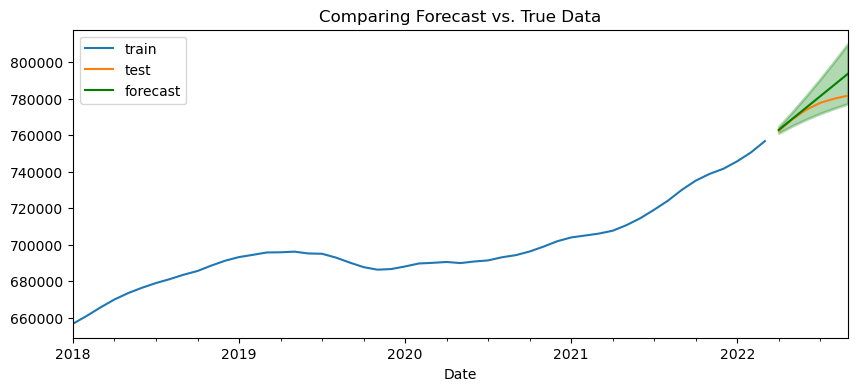

In [47]:
# Make forecasts with the auto_arima model
# Plot the forecasts versus the test data
df_tuned_forcast = tuned_arima.get_forecast(len(test)).summary_frame()
plot_forecast(train, test, df_forcast);

In [48]:
regression_metrics_ts(test, df_tuned_forcast['mean'])

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 4,224.000
- MSE = 36,270,850.333
- RMSE = 6,022.529
- R^2 = 0.196
- MAPE = 0.54%


## Comparing and Select Final Model

Manual Model:
- MAE = 4,195.246
- MSE = 35,936,469.064
- RMSE = 5,994.703
- R^2 = 0.203
- MAPE = 0.54%

Although the tuned model is a simpler model with lower AIC and BIC but the manual model has better MAE, MSE, RSME, and R2 scores. It is difficult to say which model is better than the other in this case but for this project, I will choose the manual model ARIMA(1,2,1) as my final model.

## Make True Future Forecasts 

In [62]:
# Fit the final model using the entire dataset
final_model = tsa.ARIMA(df_model,order=(1,2,1)).fit()

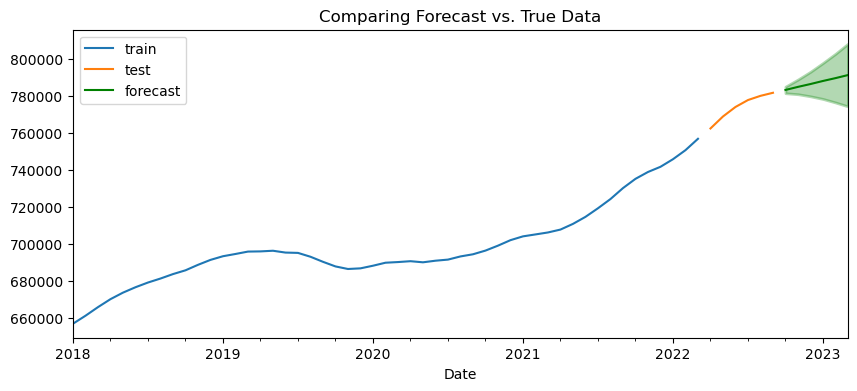

In [66]:
# Forcast New York home values 6 months into the future
forecast = final_model.get_forecast(len(test)).summary_frame()
plot_forecast(train, test, forecast);

---

## Raw values and percent change in the final month in the forecast vs. the first month

In [67]:
# Check the starting and ending dates of the forecast
forecast.index[0],forecast.index[-1]

(Timestamp('2022-10-31 00:00:00'), Timestamp('2023-03-31 00:00:00'))

In [72]:
# Defining the starting value
starting_value = forecast['mean'].iloc[0]
starting_value

783155.3378834073

In [74]:
# Defining the ending value
ending_value = forecast['mean'].iloc[-1]
ending_value

791207.5587112703

In [81]:
change = ending_value - starting_value
print(f" Model forecast indicates that the home value of New York will increase by ${change: .2f} over the forecast period.")

 Model forecast indicates that the home value of New York will increase by $ 8052.22 over the forecast period.


In [84]:
# Percent change of New York home value over the forecast period
perc_change = (change/starting_value)*100
print(f' The percent change of New York Home value over the forecast period is {perc_change:.2f}%.')

 The percent change of New York Home value over the forecast period is 1.03%.


**The predicted home value in New York City 6 months into the future will be ~ $791208**

**The percent change in home values in New York City by the end of the 6 month forecast is ~ 1.03%.**